### In this notebook we do a singular value decomposition of our feautures. It turns out that six components of the training data explain over 99% of the variance. However, our models do not perform well with so few features.

In [19]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import math
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

In [20]:
#Import the data file containing all features and classifications
df = pd.read_csv('MLNS_Final_Train.csv')

In [21]:
#Store a dataframe in X which contains all features
df_temp=df['mfcc_'+str(0)+'_avg']
df_temp=df_temp.rename('blah')
for n in range(0,40):
    df_temp=pd.concat([df_temp, df['mfcc_'+str(n)+'_avg']], axis=1)
for n in range(0,40):
    df_temp=pd.concat([df_temp, df['mfcc_'+str(n)+'_var']], axis=1)
for n in range(0,40):
    df_temp=pd.concat([df_temp, df['hs_mfcc_'+str(n)+'_avg']], axis=1)
for n in range(0,40):
    df_temp=pd.concat([df_temp, df['hs_mfcc_'+str(n)+'_var']], axis=1)
df_temp=pd.concat([df_temp, df['main_freq']], axis=1)
df_temp=pd.concat([df_temp, df['range']], axis=1)
df_temp=pd.concat([df_temp, df['max_mean']], axis=1)
df_temp=pd.concat([df_temp, df['peak_freq']], axis=1)
X=df_temp.drop(columns=['blah'])

In [22]:
#Store a series in Y which contains the classification label 'fam_or_subfam'
y=df['fam_or_subfam']

In [23]:
#Create a stratified train-validation split 
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, random_state=17, test_size=.2, stratify=y)

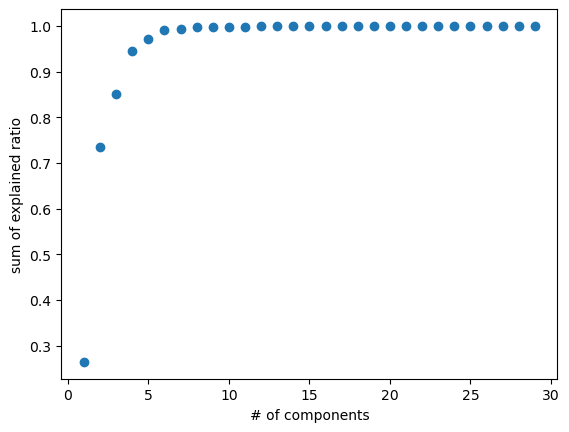

In [24]:
#Six components of the features explain over 99% of the variance.
explained_ratio = []
component_list = []
for n in range(1,30,1):
    component_list.append(n)
    svd = TruncatedSVD(n_components=n, n_iter=7, random_state=42)
    svd.fit(X_train)
    explained_ratio.append(svd.explained_variance_ratio_.sum())
plt.scatter(component_list,explained_ratio)    
plt.xlabel('# of components')
plt.ylabel('sum of explained ratio')
plt.show()